### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing & Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_ads/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Info:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Dataset Shape:

In [ ]:
df.shape

(614, 13)

## Data Cleaning

### Checking the Missing Values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
df.LoanAmount=imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))[:,0]
df.LoanAmount

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='median')
df.Credit_History=imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))[:,0]
df.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [ ]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df.Gender=imputer.fit_transform(df['Gender'].values.reshape(-1,1))[:,0]
df.Gender

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [ ]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df.Self_Employed=imputer.fit_transform(df['Self_Employed'].values.reshape(-1,1))[:,0]
df.Self_Employed

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

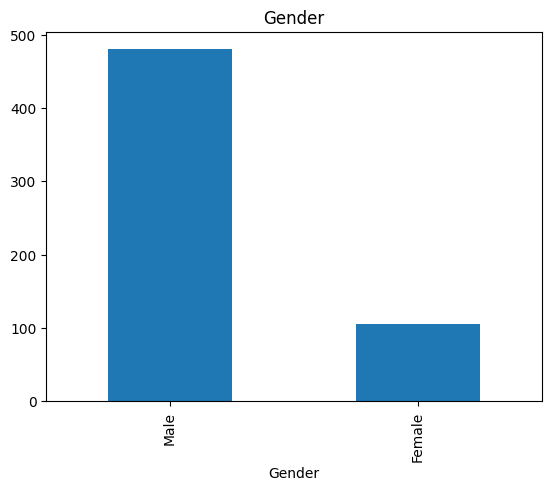

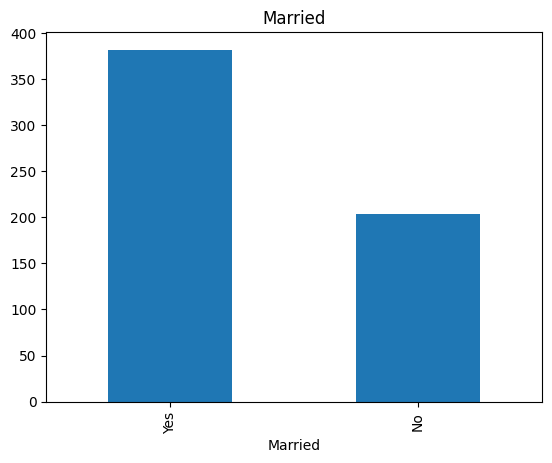

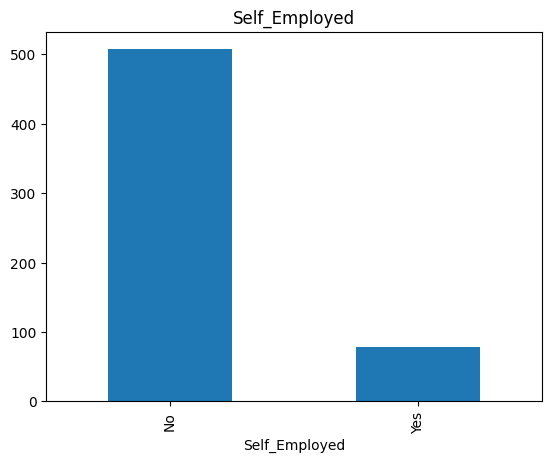

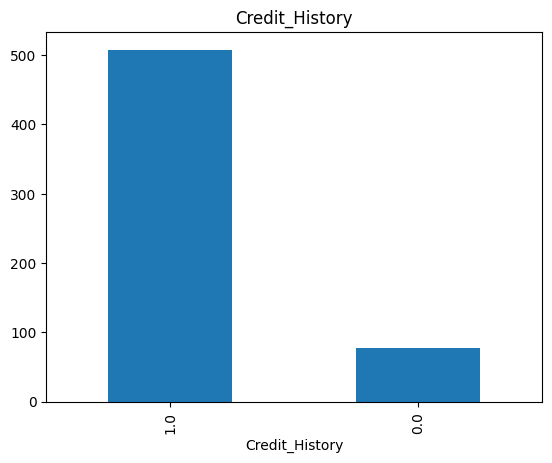

In [ ]:

df['Gender'].value_counts().plot.bar(title= 'Gender')
plt.show()
df['Married'].value_counts().plot.bar(title= 'Married')
plt.show()
df['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed')
plt.show()
df['Credit_History'].value_counts().plot.bar(title= 'Credit_History')
plt.show()

<Axes: title={'center': 'Loan Staus'}, xlabel='Loan_Status', ylabel='count'>

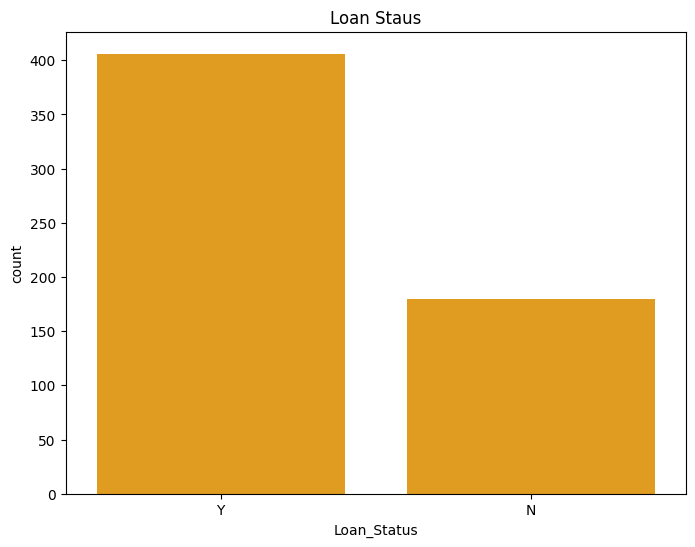

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Loan Staus")
sns.countplot(x=df['Loan_Status'],color='orange')

<Axes: xlabel='Gender'>

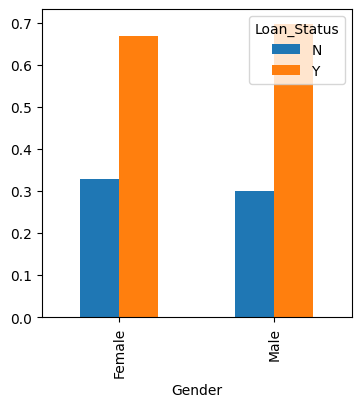

In [ ]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

In [ ]:
df=df.drop(['Loan_ID'],axis=1)

In [ ]:
df.shape

(586, 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Loan_Status']=labelencoder.fit_transform(df['Loan_Status'])
print(df['Loan_Status'])

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 586, dtype: int64


In [ ]:
df['Loan_Status'].value_counts()

Loan_Status
1    406
0    180
Name: count, dtype: int64

In [ ]:
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
print(df['Gender'])
df['Gender'].value_counts()

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 586, dtype: int64


Gender
1    480
0    106
Name: count, dtype: int64

In [ ]:
labelencoder=LabelEncoder()
df['Married']=labelencoder.fit_transform(df['Married'])
print(df['Married'].unique())
df['Married'].value_counts()

[0 1]


Married
1    382
0    204
Name: count, dtype: int64

In [ ]:
labelencoder=LabelEncoder()
df['Dependents']=labelencoder.fit_transform(df['Dependents'])
print(df['Dependents'].unique())
df['Dependents'].value_counts()

[0 1 2 3]


Dependents
0    334
1    101
2    101
3     50
Name: count, dtype: int64

In [ ]:
labelencoder=LabelEncoder()
df['Education']=labelencoder.fit_transform(df['Education'])
print(df['Education'].unique())
df['Education'].value_counts()

[0 1]


Education
0    462
1    124
Name: count, dtype: int64

In [ ]:
labelencoder=LabelEncoder()
df['Self_Employed']=labelencoder.fit_transform(df['Self_Employed'])
print(df['Self_Employed'].unique())
df['Self_Employed'].value_counts()

[0 1]


Self_Employed
0    507
1     79
Name: count, dtype: int64

In [ ]:
labelencoder=LabelEncoder()
df['Property_Area']=labelencoder.fit_transform(df['Property_Area'])
print(df['Property_Area'].unique())
df['Property_Area'].value_counts()

[2 0 1]


Property_Area
1    225
2    188
0    173
Name: count, dtype: int64

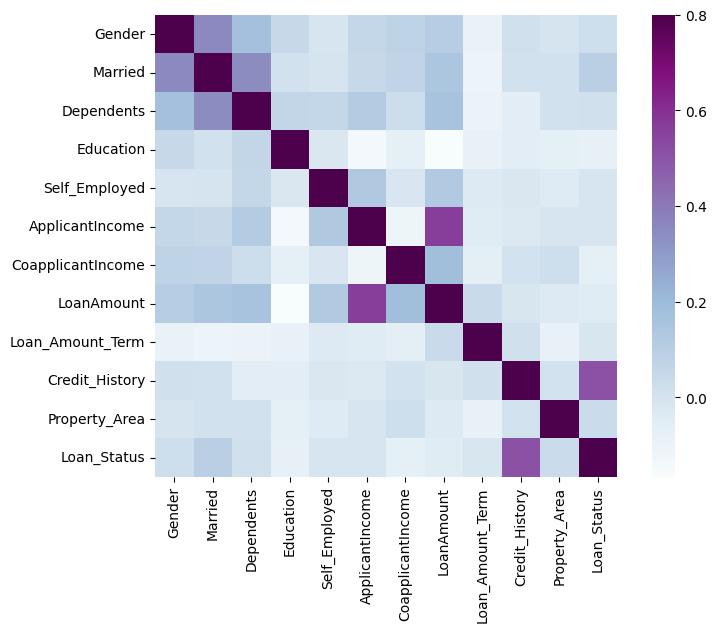

In [ ]:
matrix = df.corr()
ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [ ]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    20
120.000000    18
110.000000    16
100.000000    14
187.000000    12
              ..
72.000000      1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 204, dtype: int64

In [ ]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    502
180.0     43
300.0     13
480.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

Credit_History
1.0    508
0.0     78
Name: count, dtype: int64

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### Importing Packages for Classification algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Splitting the data into Train and Test set

In [ ]:
X = df.iloc[1:542,1:11].values
y = df.iloc[1:542,11].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Logistic Regression (LR)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7730061349693251


In [ ]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1]
y_test [0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1]


In [ ]:
from sklearn import metrics

print('R2 Score: ',metrics.r2_score(y_test,lr_prediction))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,lr_prediction))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,lr_prediction))
print('Root Mean Square Error: ',np.sqrt(metrics.mean_squared_error(y_test,lr_prediction)))

R2 Score:  -0.006508678237650223
Mean Absolute Error:  0.22699386503067484
Mean Squared Error:  0.22699386503067484
Root Mean Square Error:  0.47643873166512696
